In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Cargar el archivo Excel
df = pd.read_excel('/Book1-1.xlsx')

# Seleccionar los datos desde la fila 3 hasta la 40 (índices 2 a 39, porque Python empieza en 0)
# Y seleccionar las columnas C y D (índices 2 y 3 si las columnas están como A=0, B=1, C=2, D=3)
x = df.iloc[2:40, 2].tolist()  # Columna C
y = df.iloc[2:40, 3].tolist()  # Columna D


# Mostrar un vistazo a los datos
print("x:", x[:5])  # Muestra los primeros 5 elementos de x
print("y:", y[:5])  # Muestra los primeros 5 elementos de y

datos = {
    "X": x,
    "Y": y,
    "er X": np.zeros(len(x))+0.01,
    "er Y": np.zeros(len(y))+0.1
}

# Crear DataFrame
datos = pd.DataFrame(datos)

print(datos)




x: [-0.29, -0.39, -0.49, -0.59, -0.69]
y: [-7.5, -10.4, -13.1, -15.5, -18.4]
       X     Y  er X  er Y
0  -0.29  -7.5  0.01   0.1
1  -0.39 -10.4  0.01   0.1
2  -0.49 -13.1  0.01   0.1
3  -0.59 -15.5  0.01   0.1
4  -0.69 -18.4  0.01   0.1
5  -0.79 -20.7  0.01   0.1
6  -0.89 -23.7  0.01   0.1
7  -0.99 -24.7  0.01   0.1
8  -1.09 -26.1  0.01   0.1
9  -1.19 -31.4  0.01   0.1
10 -1.29 -33.7  0.01   0.1
11 -1.39 -35.3  0.01   0.1
12 -1.49 -39.4  0.01   0.1
13 -1.59 -43.6  0.01   0.1
14 -1.69 -46.8  0.01   0.1
15 -1.79 -49.6  0.01   0.1
16 -1.89 -50.5  0.01   0.1
17 -1.99 -54.6  0.01   0.1
18  0.15   4.4  0.01   0.1
19  0.25   7.3  0.01   0.1
20  0.35   9.2  0.01   0.1
21  0.45  11.6  0.01   0.1
22  0.55  13.9  0.01   0.1
23  0.65  18.3  0.01   0.1
24  0.75  19.9  0.01   0.1
25  0.85  22.7  0.01   0.1
26  0.95  26.4  0.01   0.1
27  1.05  29.3  0.01   0.1
28  1.15  30.8  0.01   0.1
29  1.25  34.2  0.01   0.1
30  1.35  36.7  0.01   0.1
31  1.45  40.2  0.01   0.1
32  1.55  41.8  0.01   0.1
33  1

Slope: 26.87221019987351 ± 0.013499159278092792
Intercept: 0.27073413091525933 ± 0.016441220609035044
Residuals: 0      0.222068
1     -1.905722
2     -2.033511
3      0.838699
4     -1.289091
5      2.583119
6     -0.544671
7     16.327540
8     29.199750
9      3.071960
10     6.944170
11    17.816380
12     3.688591
13   -11.439199
14   -16.566989
15   -17.694779
16     0.177431
17   -13.950358
18     0.984343
19     3.112133
20    -4.760077
21    -7.632287
22   -11.504497
23     5.623292
24    -5.248918
25    -4.121128
26     6.006662
27     8.134452
28    -3.737759
29     3.390031
30     1.517821
31     9.645611
32    -1.226599
33   -13.098810
34    11.028980
35     2.156770
36   -15.715440
dtype: float64


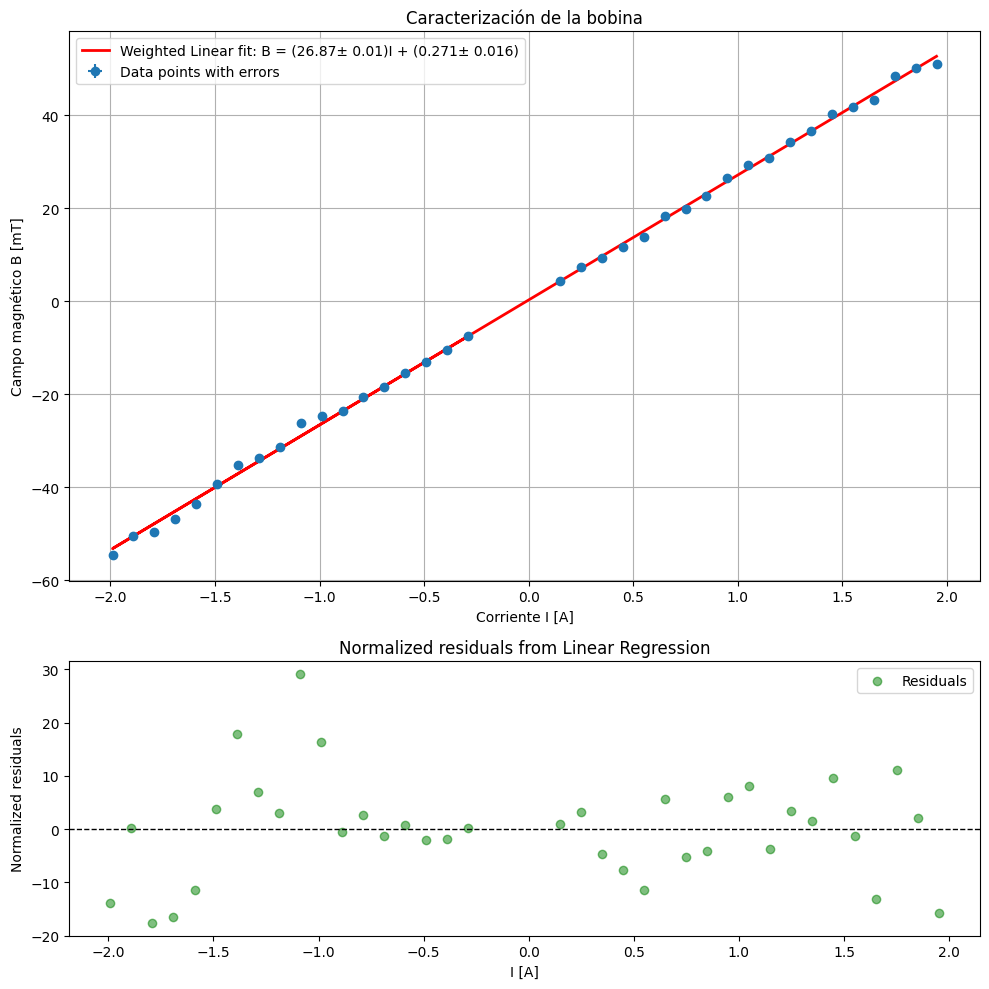

In [16]:

# Define the linear function for curve fitting
def linear_function(X, a, b):
    return a * X + b

# Perform the curve fitting considering the uncertainties
popt, pcov = curve_fit(linear_function, data['X'], data['Y'], sigma=data['er Y'], absolute_sigma=True)


# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables
x = data['X']
y = data['Y']
yerr = data['er Y']
xerr = data['er X']

# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate normalized residuals
residuals = (y - Y_pred)/yerr

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Data points with errors')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Weighted Linear fit: B = ({slope:.2f}± {slope_std_err:.2f})I + ({intercept:.3f}± {intercept_std_err:.3f})')

ax1.set_xlabel('Corriente I [A]')
ax1.set_ylabel("Campo magnético B [mT]")
ax1.legend(loc='upper left')
ax1.set_title('Caracterización de la bobina')
ax1.grid(True)

# Plot normalized residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('I [A]')
ax2.set_ylabel('Normalized residuals')
ax2.legend(loc='upper right')
ax2.set_title('Normalized residuals from Linear Regression')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Weighted_linear_regression_with_normalized_residuals_curve_fit.pdf', format='pdf')
plt.show()



In [ ]:
print(slope_std_err/)

9.565419876970408e-05
